In [1]:
import requests
res = requests.post("http://localhost:8080/predictions/cifar/1.0", files={'data': open('cifar10_images/6_frog.png', 'rb')})
res.json()

{'frog': 0.5459879636764526,
 'cat': 0.31807374954223633,
 'deer': 0.09123771637678146,
 'bird': 0.04051413759589195,
 'dog': 0.0033411909826099873}

In [3]:
res = requests.post("http://localhost:8080/explanations/cifar/1.0", files={'data': open('cifar10_images/6_frog.png', 'rb')})
ig = res.json()
ig

[[[0.00668990559779686,
   -0.020926091726952464,
   0.020093336524176417,
   0.0030825972374991088,
   -0.019231011533168692,
   0.07686164078829484,
   0.013734480604207332,
   -0.012276445327955942,
   0.006605947359985754,
   0.021526486046576407,
   -0.014205297827248317,
   -0.14594802834802173,
   -0.029020614384129714,
   0.028519670905853594,
   0.03376665875584388,
   -0.0024643081338221033,
   -0.01232930967033208,
   0.013676948952898456,
   0.012640718678529785,
   0.019779664347304448,
   0.0012147873599384783,
   -0.021075843512756567,
   0.016033846467866614,
   0.03962328589844316,
   0.0031238869551439407,
   0.0036787997309209826,
   -0.056129297333950785,
   -0.01316786763970975,
   -0.01408322650316175,
   -0.024243360604636312,
   -0.007039382637057031,
   -0.005505579499928633],
  [0.01651106324114395,
   0.00954307395910533,
   0.02783693531780442,
   0.03054691931274539,
   -0.022597900891688755,
   -0.05035109042858467,
   -0.14247464584229125,
   -0.043975447

In [4]:
import torch
import numpy as np
import torchvision.transforms as T
from PIL import Image
from captum.attr import visualization as viz

/home/ubuntu/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
img_path = "cifar10_images/6_frog.png"

inp_image = Image.open(img_path)
to_tensor = T.Compose([
	T.Resize((32, 32)),
	T.ToTensor()
])
inp_image = to_tensor(inp_image)

inp_image = inp_image.numpy()
attributions = np.array(ig)

inp_image, attributions = inp_image.transpose(1, 2, 0), attributions.transpose(1, 2, 0)
inp_image.shape, attributions.shape

((32, 32, 3), (32, 32, 3))

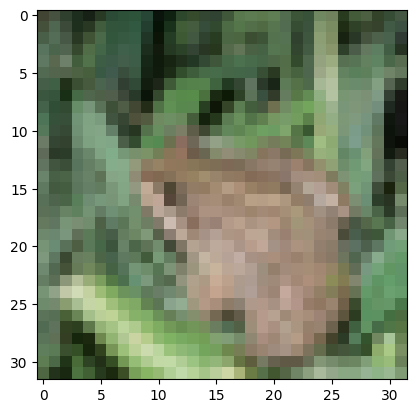

In [7]:
import matplotlib.pyplot as plt

plt.imshow(inp_image, cmap="inferno")

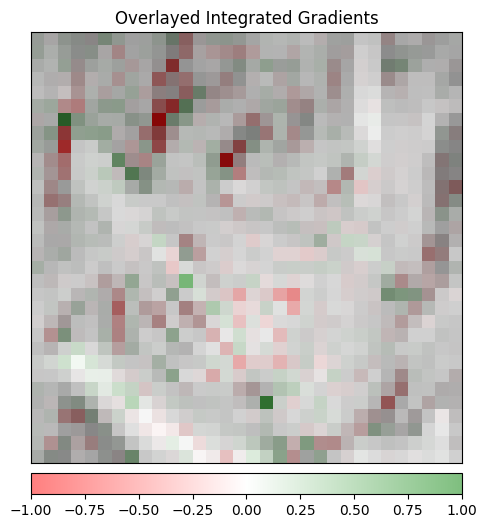

(<Figure size 600x600 with 2 Axes>,
 <Axes: title={'center': 'Overlayed Integrated Gradients'}>)

In [8]:
viz.visualize_image_attr(attributions, inp_image, method="blended_heat_map",sign="all", show_colorbar=True, title="Overlayed Integrated Gradients")